In this part of the homework, you will download 3 time series that were produced by TESS. The format of the data is given in two columns: Time (BJD = Barycentric Julian Date, or days) and differential magnitude (mmag). Each file containing the time series is formatted as 'IDnumber.rw', and there are no headers or column headings (in other words, they are barebones ASCII files).

The three files are available at the following links:

https://drive.google.com/open?id=1etymBPHbCCF_sBYhmGkqP0lYpKGtl4O9

https://drive.google.com/open?id=1q10RiwR20PpBDsWM6MAJY_L9sfrod_N0

https://drive.google.com/open?id=1wQ2zloxuoZ4xfyLLyNSltveOLek4C8-8

Start by loading the data and plotting each of these time series (with proper axes and with the ID number shown for each star).

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.stats import LombScargle
import scipy as sp
import scipy.stats as stats

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Data ingestion**

In [5]:
cd "drive/My Drive/dsps/HW11"

/content/drive/My Drive/dsps/HW11


In [6]:
ls

ts1.rw  ts2.rw  ts3.rw


In [7]:
ts1 = pd.read_csv("ts1.rw", delim_whitespace= True, header = None, names = ['BJD', 'diffmag'])
ts2 = pd.read_csv("ts2.rw", delim_whitespace= True, header = None, names = ['BJD', 'diffmag'])
ts3 = pd.read_csv("ts3.rw", delim_whitespace= True, header = None, names = ['BJD', 'diffmag'])
print(ts1.head())
print(ts2.head())
print(ts3.head())

           BJD   diffmag
0  1468.277296 -0.006142
1  1468.278685 -0.006294
2  1468.280074 -0.006214
3  1468.281463 -0.006281
4  1468.282852 -0.006453
           BJD   diffmag
0  1468.276144  0.030515
1  1468.277532  0.032342
2  1468.278921  0.033998
3  1468.280310  0.034609
4  1468.281699  0.036624
           BJD   diffmag
0  1325.296126  0.022374
1  1325.297515  0.022118
2  1325.298904  0.026386
3  1325.300293  0.013699
4  1325.301682  0.025005


# **Plotting each time series**

''

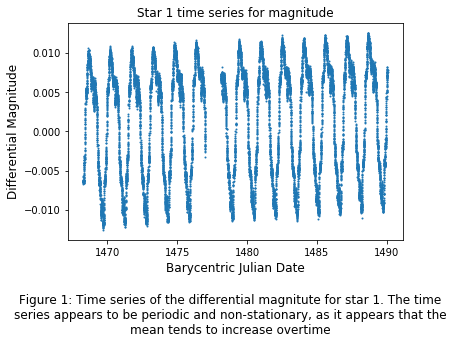

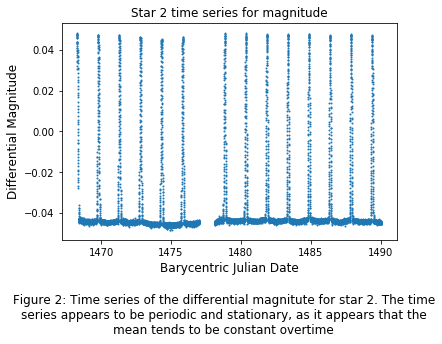

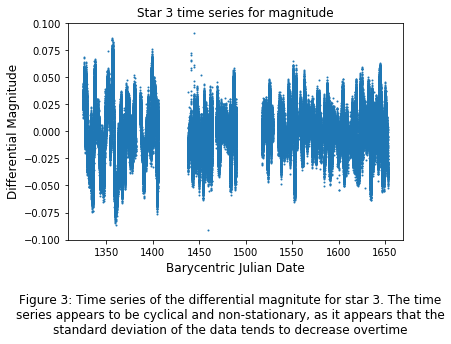

In [32]:
plt.figure()
plt.plot(ts1['BJD'],ts1['diffmag'], '.', ms = 2)
plt.xlabel('Barycentric Julian Date', fontsize = 'large')
plt.ylabel('Differential Magnitude', fontsize = 'large')
plt.title('Star 1 time series for magnitude')

txt = "Figure 1: Time series of the differential magnitute for star 1. The time\n\
series appears to be periodic and non-stationary, as it appears that the\n\
mean tends to increase overtime"

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)
;

plt.figure()
plt.plot(ts2['BJD'],ts2['diffmag'], '.', ms = 2)
plt.xlabel('Barycentric Julian Date', fontsize = 'large')
plt.ylabel('Differential Magnitude', fontsize = 'large')
plt.title('Star 2 time series for magnitude', fontsize = 'large')

txt = "Figure 2: Time series of the differential magnitute for star 2. The time\n\
series appears to be periodic and stationary, as it appears that the\n\
mean tends to be constant overtime"

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)
;
plt.figure()
plt.plot(ts3['BJD'],ts3['diffmag'], '.', ms = 2)
plt.xlabel('Barycentric Julian Date', fontsize = 'large')
plt.ylabel('Differential Magnitude', fontsize = 'large')
plt.title('Star 3 time series for magnitude', fontsize = 'large')

txt = "Figure 3: Time series of the differential magnitute for star 3. The time\n\
series appears to be cyclical and non-stationary, as it appears that the\n\
standard deviation of the data tends to decrease overtime"

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)
;

The first two time series look periodic, while the third time series seems to be cyclical.


# **Computing Lomb-Scargle periodograms for each time series**

Using the package loaded above (LombScargle), compute the periodogram (either the power spectrum or the amplitude spectrum, as discussed in class) for each time series, and then plot each periodogram, making sure to properly label the axes and to identify each star. Make sure to choose the frequency range wisely.

For more documentation on the LombScargle package: https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle

For the normalization, make sure to use "psd" so that we can recover units.

In [0]:
fourier_1 = LombScargle(ts1['BJD'], ts1['diffmag'], normalization='psd').autopower()
fourier_2 = LombScargle(ts2['BJD'], ts2['diffmag'], normalization='psd').autopower()
fourier_3 = LombScargle(ts3['BJD'], ts3['diffmag'], normalization='psd').autopower()

''

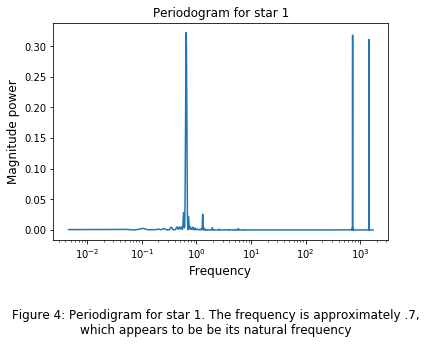

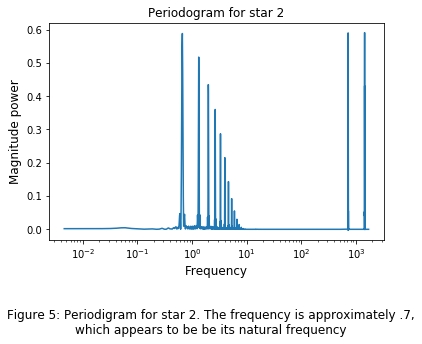

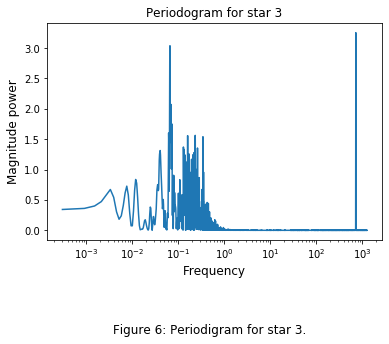

In [71]:
plt.figure()
plt.plot(fourier_1[0], fourier_1[1])
plt.xscale('log')
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Frequency", fontsize="large")
plt.title('Periodogram for star 1', fontsize = 'large')

txt = "Figure 4: Periodigram for star 1. The frequency is approximately .7,\n\
which appears to be be its natural frequency"

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)

;

plt.figure()
plt.plot(fourier_2[0], fourier_2[1])
plt.xscale('log')
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Frequency", fontsize="large")
plt.title('Periodogram for star 2', fontsize = 'large')


txt = "Figure 5: Periodigram for star 2. The frequency is approximately .7,\n\
which appears to be be its natural frequency"

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)
;

plt.figure()
plt.plot(fourier_3[0], fourier_3[1])
plt.xscale('log')
plt.ylabel("Magnitude power", fontsize="large")
plt.xlabel("Frequency", fontsize="large")
plt.title('Periodogram for star 3', fontsize = 'large')

txt = "Figure 6: Periodigram for star 3."

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)
;

In [45]:
print('Period for star 1:',np.argmax(fourier_1[1]))
print('Period for star 2:',np.argmax(fourier_2[1][:10000]))
print('Period for star 3:',np.argmax(fourier_3[1][:1000000]))

Period for star 1: 70
Period for star 2: 72
Period for star 3: 108


Based on the periodograms you have plotted, add a text box below and indicate what type of variability is exhibited by each of the stars. If one of the stars exhibits *periodic* variations, please also indicate the value of that period.

# **Phase folding**

For any star above exhibiting periodic variations, you will phase-fold their time series. This is accomplished by rescaling the exogenous variable, dividing it by the period (keep in mind that period = 1/frequency, and that if you have multiple periods, or harmonics, you should divide by the fundamental period). However, only the fractional part (e.g. np.modf(x)[0]) of the period must be considered (which means that the axis containing the exogenous variable will no longer be monotonically increasing; therefore, make sure to reorder the dataset appropriately).

Then, plot the phase-folded light curve(s) and identify them accordingly.

In [0]:
ts1_folded = pd.DataFrame()
ts1_folded['phase'] = np.mod(ts1['BJD'], 1/fourier_1[0][70])
ts1_folded['dmag'] = ts1['diffmag']

ts2_folded = pd.DataFrame()
ts2_folded['phase'] = np.mod(ts2['BJD'], 1/fourier_2[0][72])
ts2_folded['dmag'] = ts2['diffmag']

ts3_folded = pd.DataFrame()
ts3_folded['phase'] = np.mod(ts3['BJD'], 1/fourier_3[0][108])
ts3_folded['dmag'] = ts3['diffmag']

''

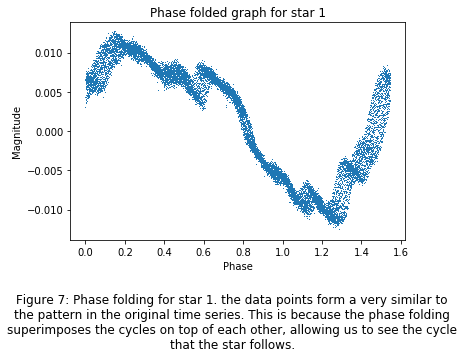

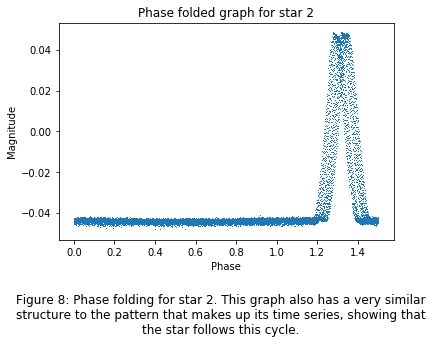

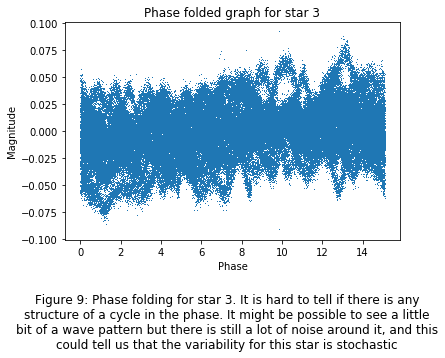

In [69]:
plt.figure()
plt.plot(ts1_folded.phase, ts1_folded.dmag, ',')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star 1')

txt = "Figure 7: Phase folding for star 1. the data points form a very similar to\n\
the pattern in the original time series. This is because the phase folding\n\
superimposes the cycles on top of each other, allowing us to see the cycle\n\
that the star follows."

plt.figtext(0.5, -0.25, txt, ha = 'center', fontsize = 12)
;

plt.figure()
plt.plot(ts2_folded.phase, ts2_folded.dmag, ',')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star 2')

txt = "Figure 8: Phase folding for star 2. This graph also has a very similar\n\
structure to the pattern that makes up its time series, showing that\n\
the star follows this cycle."

plt.figtext(0.5, -0.2, txt, ha = 'center', fontsize = 12)
;

plt.figure()
plt.plot(ts3_folded.phase, ts3_folded.dmag, ',')
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star 3')

txt = "Figure 9: Phase folding for star 3. It is hard to tell if there is any\n\
structure of a cycle in the phase. It might be possible to see a little\n\
bit of a wave pattern but there is still a lot of noise around it, and this\n\
could tell us that the variability for this star is stochastic"

plt.figtext(0.5, -0.25, txt, ha = 'center', fontsize = 12)
;

# **Binning**

Finally, you will bin the data so that the phased light curve(s) contains 20 bins (from 0 to 1). To do so, you can use the df.resample() method (or any other method you wish), averaging all the points within each bin. Overplot the binned light curve(s) over the original data using a larger symbol size (and perhaps a different color), and connect the binned points with a line. Are 20 bins appropriate? If not, add more bins and explain why.

In [0]:
means_1, edges_1, binnum_1 = stats.binned_statistic(
    ts1_folded.phase, ts1_folded.dmag, bins=20)
means_2, edges_2, binnum_2 = stats.binned_statistic(
    ts2_folded.phase, ts2_folded.dmag, bins=20)
means_3, edges_3, binnum_3 = stats.binned_statistic(
    ts3_folded.phase, ts3_folded.dmag, bins=20)

''

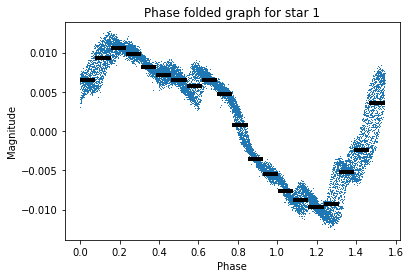

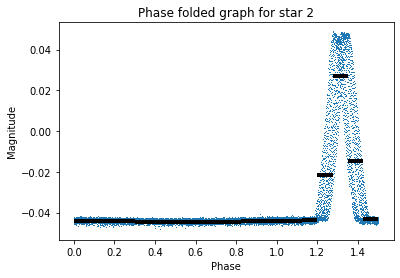

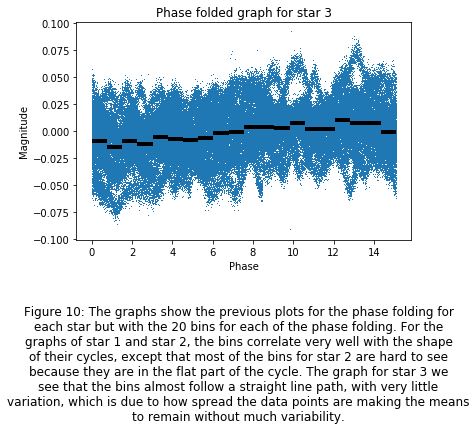

In [62]:
plt.figure()
plt.plot(ts1_folded.phase, ts1_folded.dmag, ',', zorder=0)
plt.hlines(means_1, edges_1[:-1], edges_1[1:], 'k', lw=4, zorder=1)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star 1')
;

plt.figure()
plt.plot(ts2_folded.phase, ts2_folded.dmag, ',', zorder=0)
plt.hlines(means_2, edges_2[:-1], edges_2[1:], 'k', lw=4, zorder=1)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star 2')
;

plt.figure()
plt.plot(ts3_folded.phase, ts3_folded.dmag, ',', zorder=0)
plt.hlines(means_3, edges_3[:-1], edges_3[1:], 'k', lw=4, zorder=1)
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.title('Phase folded graph for star 3')

txt = "Figure 10: The graphs show the previous plots for the phase folding for\n\
each star but with the 20 bins for each of the phase folding. For the\n\
graphs of star 1 and star 2, the bins correlate very well with the shape\n\
of their cycles, except that most of the bins for star 2 are hard to see\n\
because they are in the flat part of the cycle. The graph for star 3 we\n\
see that the bins almost follow a straight line path with very little\n\
variation, which is due to how spread the data points are making the means\n\
to remain without much variability."

plt.figtext(0.5, -0.5, txt, ha = 'center', fontsize = 12)

;